In [1]:
#Import required libraries
import numpy as np
import pandas as pd

In [2]:
#Import the dataset
dataset = pd.read_csv('telcochurndata.csv')

In [136]:
#Glance at the first five records
dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [137]:
#Print all the features of the data
dataset.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [100]:
#Churners vs Non-Churners
dataset['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [171]:
dataset['State'].nunique()

51

In [139]:
# Group telco by 'Churn' and compute the mean
print(dataset.groupby('Churn')['Customer service calls'].mean())

Churn
False    1.449825
True     2.229814
Name: Customer service calls, dtype: float64


In [140]:
# Count the number of churners and non-churners by State
print(dataset.groupby('State')['Churn'].value_counts())

State  Churn
AK     False    49
       True      3
AL     False    72
       True      8
AR     False    44
                ..
WI     True      7
WV     False    96
       True     10
WY     False    68
       True      9
Name: Churn, Length: 102, dtype: int64


In [141]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

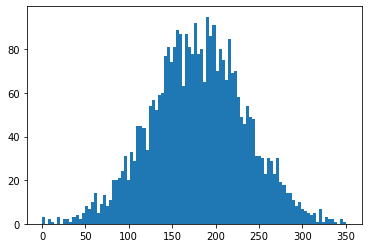

In [142]:
# Visualize the distribution of 'Total day minutes'
plt.hist(dataset['Total day minutes'], bins = 100)

# Display the plot
plt.show()

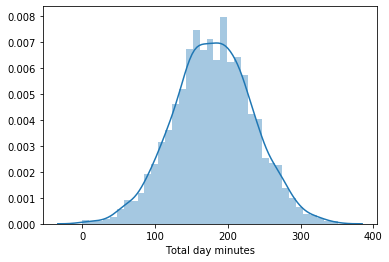

In [143]:
# Visualize the distribution of 'Total day minutes'
sns.distplot(dataset['Total day minutes'])

# Display the plot
plt.show()

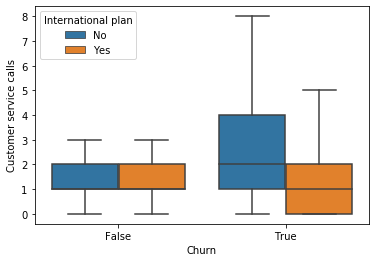

In [144]:
#Create the box plot
sns.boxplot(x = 'Churn',
            y = 'Customer service calls',
            data = dataset,
            sym = "",          #Remove outliers
            hue = "International plan") 
# Display the plot
plt.show()

In [3]:
dataset.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [149]:
#Import the dataset
dataset = pd.read_csv('telcochurndata.csv')

In [150]:
#Features and Labels
X = dataset.iloc[:, 0:19].values
y = dataset.iloc[:, 19].values

In [151]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,Yes,No,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5,10,1.35,2


In [152]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder

labelencoder_X_1 = LabelEncoder()
X[:, 3] = labelencoder_X_1.fit_transform(X[:, 3])

labelencoder_X_2 = LabelEncoder()
X[:, 4] = labelencoder_X_2.fit_transform(X[:, 4])

In [153]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)


In [156]:
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
3328,0
3329,0
3330,0
3331,0


In [157]:
X_State = pd.get_dummies(X[:,0], drop_first = True)

In [158]:
X_State.head()

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
X = pd.DataFrame(X)
X = X.drop([0], axis=1)
frames = [X_State,X]
result = pd.concat(frames, axis=1, ignore_index=True)

In [161]:
result.shape

(3333, 68)

In [164]:
#Features and Labels
X = result

In [165]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [166]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [167]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,-0.155573,-0.133962,-0.135405,-0.101149,-0.136835,-0.150437,-0.128037,-0.141042,-0.139653,-0.133962,...,-0.879648,-0.653460,-0.879573,-0.377791,-1.214353,-0.379791,-0.334364,-0.605667,-0.336336,1.097125
1,-0.155573,-0.133962,-0.135405,-0.101149,-0.136835,-0.150437,-0.128037,-0.141042,-0.139653,-0.133962,...,-0.781652,-0.403801,-0.782731,-0.174258,0.602831,-0.173408,-0.049965,-0.605667,-0.046662,1.097125
2,-0.155573,-0.133962,-0.135405,-0.101149,-0.136835,-0.150437,-0.128037,-0.141042,-0.139653,-0.133962,...,-1.007043,0.295246,-1.006391,-0.976535,-0.204806,-0.976985,-0.227714,-1.425524,-0.231000,0.338190
3,-0.155573,-0.133962,-0.135405,-0.101149,-0.136835,-0.150437,-0.128037,-0.141042,-0.139653,-0.133962,...,-0.519022,0.145451,-0.519873,-0.332342,0.602831,-0.331489,-1.720811,0.214190,-1.718868,-0.420745
4,-0.155573,-0.133962,-0.135405,-0.101149,-0.136835,-0.150437,-0.128037,-0.141042,-0.139653,-0.133962,...,0.468778,1.643408,0.469303,-0.294797,-1.214353,-0.296360,-1.471962,0.214190,-1.468696,0.338190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,-0.155573,-0.133962,-0.135405,-0.101149,-0.136835,-0.150437,-0.128037,-0.141042,-0.139653,7.464811,...,0.137551,0.844498,0.137272,-2.675938,-1.466740,-2.676351,-0.121064,-0.605667,-0.125664,-0.420745
2662,-0.155573,-0.133962,-0.135405,-0.101149,-0.136835,-0.150437,-0.128037,-0.141042,-0.139653,-0.133962,...,0.110112,-1.652099,0.109603,0.262449,1.309514,0.261313,-1.543062,-1.015595,-1.547698,-1.179680
2663,-0.155573,-0.133962,-0.135405,-0.101149,-0.136835,-0.150437,-0.128037,-0.141042,-0.139653,-0.133962,...,0.355102,0.295246,0.354015,-0.899469,0.148535,-0.897944,0.305535,-1.015595,0.308846,-0.420745
2664,-0.155573,-0.133962,-0.135405,-0.101149,-0.136835,-0.150437,-0.128037,-0.141042,-0.139653,-0.133962,...,0.739247,0.345178,0.739079,-2.203662,-0.558148,-2.202109,-0.121064,-0.605667,-0.125664,1.097125


In [173]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [174]:
# Predict the labels of test set
y_pred = svc.predict(X_test)

In [178]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(X_train, y_train)

/Users/sami/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [184]:
# Predict the labels of test set
y_pred = clf.predict(X_test)

In [189]:

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9385307346326837

In [177]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf = DecisionTreeClassifier()

# Fit the classifier
clf.fit(X_train, y_train)

# Predict the labels of test set
y_pred = clf.predict(X_test)

In [187]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)


/Users/sami/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [188]:
# Predict the labels of test set
y_pred = clf.predict(X_test)

In [191]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[575   4]
 [ 37  51]]
